In [30]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np
np.set_printoptions(precision=2) 
np.set_printoptions(linewidth=160)
%config InlineBackend.print_figure_kwargs={'facecolor' : "w", 'bbox_inches': 'tight'}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
from bbq.logging.vis import load_json, get_config_files, load_config, plot_stats, plot_pulse
from bbq.logging.result_vis import get_rep_stats, plot_rep, compile_result, plot_result

## Single Experiment

In [32]:
data_path = 'sample_data'
folder = f'{data_path}/arm/Line/1/'

metrics = load_json(folder+'metrics.json')
p = load_config(get_config_files(folder))

### View Stats

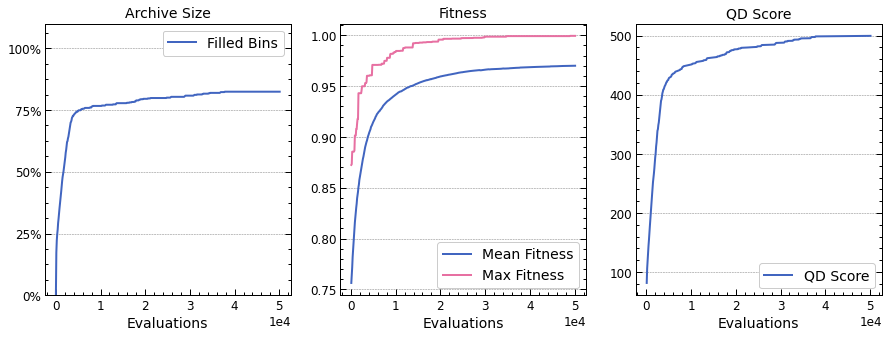

In [33]:
fig, ax = plot_stats(metrics, p)

### View Emitter Performance

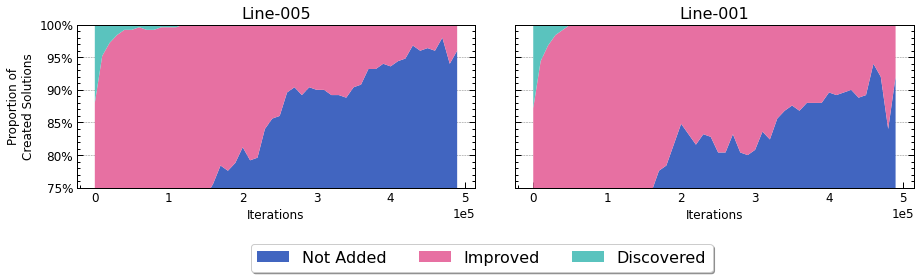

In [34]:
import pickle
with open(folder+'emitter_pulse.pkl', 'rb') as f:
    pulses = pickle.load(f)
fig, ax = plot_pulse(pulses, p)

---

## Replicates from Single Experiment

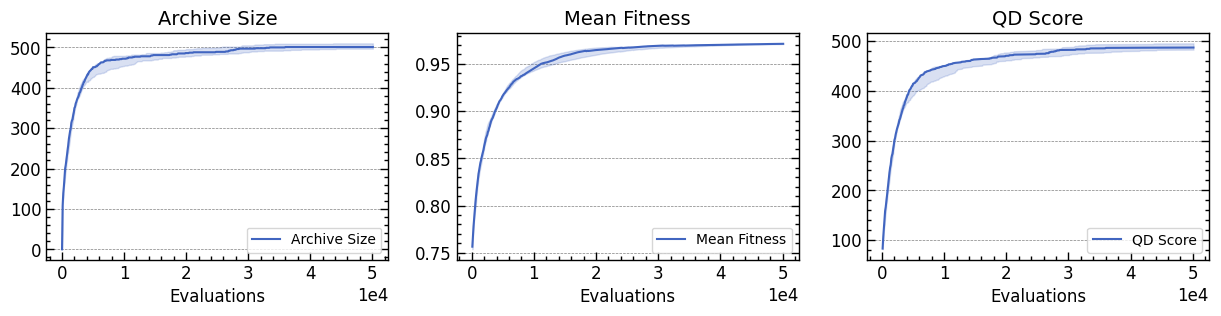

In [35]:
# Collect summary stats for one set of replicates
folder = 'sample_data/arm/Line/'
stats = get_rep_stats(folder) 

with plt.style.context(['bbq_line']):
    fig, ax = plt.subplots(ncols=3, figsize=(15,3), dpi=100)  

plot_rep(stats['Archive Size'], ax[0])
plot_rep(stats['Mean Fitness'], ax[1])
plot_rep(stats['QD Score'], ax[2])

## Comparing Replicates from Multiple Experiments

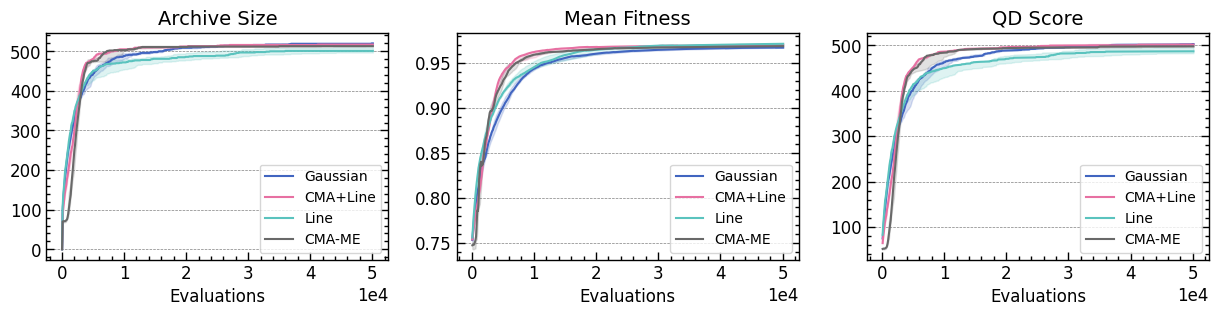

In [36]:
# Get stats for each folder
result_dict = compile_result('sample_data/arm')

# Plot comparison plot for each stat
with plt.style.context(['bbq_line']):
    fig, ax = plt.subplots(ncols=3, figsize=(15,3), dpi=100)    
plot_result(result_dict, 'Archive Size', ax=ax[0])
plot_result(result_dict, 'Mean Fitness', ax=ax[1])
plot_result(result_dict, 'QD Score', ax=ax[2])

